This notebook replicates the code for Lesson 6 of QF607

# 👉 <a id = "top">Table of Contents</a> 👈 

# [1. Estimate Pi](#p1)

# [2. Calculate Integral](#p2)

# [3. Calculate Integral with Control Variate](#p3)

# [4. Test mid square method](#p4)

# [5. Test numpy random number generation](#p5)

# [6. Brownian Motion Generation](#p6)

In [1]:
import random
import numpy as np
import math
from matplotlib import pyplot as plt

# <a id = "p1">1.</a>  <font color = "green"> Estimate Pi </font>  [back to table of contents](#top)

In [2]:
def estimate_pi(n):
    count = 0
    for i in range(n):
        x = random.uniform(-1, 1)
        y = random.uniform(-1, 1)
        if x**2 + y**2 <= 1:
            count += 1
    return 4 * count / n

In [3]:
print("pi from MC: ",estimate_pi(1000000))

pi from MC:  3.140748


# <a id = "p2">2.</a>  <font color = "green"> Calculate Integral </font>  [back to table of contents](#top)

In [4]:
def fx(x):
    return x*x; 

In [5]:
def integralX2():
    N = 1000000
    accum , hsquare = 0, 0
    for i in range(N):
        x = np.random.uniform(0, 1)
        xsqur = fx(x)
        accum += xsqur
        hsquare += xsqur * xsqur
    result = accum/float(N)
    stderr = math.sqrt((hsquare/float(N) -result*result)/float(N))
    print("intgral using MC result/stderr: ", result, stderr)

In [6]:
integralX2()

intgral using MC result/stderr:  0.33349160421486396 0.00029810041653585456


# <a id = "p3">3.</a>  <font color = "green"> Calculate integral with Control Variate </font>  [back to table of contents](#top)

In [7]:
def fx(x):
    return x*x; 

def gx(x):
    return x; 

def mean_gx():
    return 0.5; 

In [8]:
# integral \int_0^1 x*x da , use x as control variate; for solve it analytically =1
def estimateBeta(): 
    np.random.seed(0)
    Npath = 1000
    data = np.random.uniform(0, 1, Npath)
    fValue = np.zeros(Npath)
    gValue = np.zeros(Npath)
    for i in range(1, Npath):
        fValue[i] =fx(data[i])
        gValue[i] =gx(data[i])
    varG = np.var(gValue)
    cov = np.cov(fValue, gValue)
    beta = cov[0][1]/varG
    print(varG)
    print(cov)
    return beta

In [9]:
def integralX2WithCV():
    N = 1000000
    accum , hsquare = 0, 0
    beta = estimateBeta()
    print("beta:", beta)
    mean_gxValue = mean_gx()
    for i in range(N):
        x = np.random.uniform(0, 1)
        fxValue = fx(x) + beta *( mean_gxValue -  gx(x))
        accum += fxValue        
        hsquare += fxValue * fxValue
    result = accum/float(N)
    stderr = math.sqrt((hsquare/float(N) - result*result)/float(N))
    print("result/stderr with CV: ", result, stderr)

In [10]:
integralX2WithCV()

0.08469052612791667
[[0.0920601 0.0855744]
 [0.0855744 0.0847753]]
beta: 1.0104365662394061
result/stderr with CV:  0.33333665512681776 7.456530060488676e-05


# <a id = "p4">4.</a>  <font color = "green"> Test mid square method </font>  [back to table of contents](#top)

In [11]:
def testMidSquareRNG():
    xs = [0] * 100
    xs[0] = 0.2372 # seed
    for i in range(1, 100):
        xs[i]=(int(xs[i-1]**2*1.0e6)%1e4)/1.0e4
    plt.scatter(range(100), xs)
    plt.show()

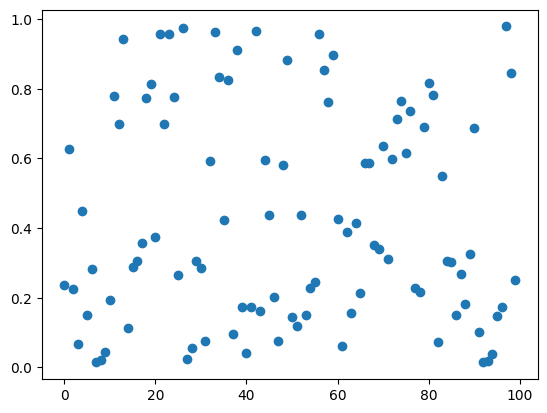

In [12]:
testMidSquareRNG()

# <a id = "p5">5.</a>  <font color = "green"> Test numpy random number generation </font>  [back to table of contents](#top)

In [13]:
# use histograms for visualizing the distribution of numerical data.
def testRNG():
    np.random.seed(0)
    data = np.random.normal(0, 1, 10000)
    # generates evenly spaced numbers over a specified range
    bins = np.linspace(math.ceil(min(data)),
                       math.floor(max(data)),
                       50)  # fixed number of bins
    plt.xlim([min(data) - 0.5, max(data) + 0.5]) #X-axis
    plt.hist(data, bins=bins) 
    plt.xlabel('variable X (50 evenly spaced bins)')
    plt.ylabel('count')
   # plt.savefig('../figs/rngNormal.eps', format = 'eps')
    plt.show()

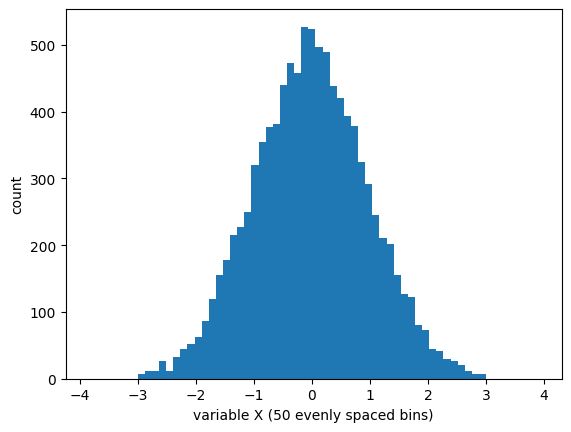

In [14]:
testRNG()

# <a id = "p6">6.</a>  <font color = "green"> Brownian Motion Generation </font>  [back to table of contents](#top)

In [15]:
def testBrownian():
    np.random.seed(0)
    # generate 3 brownian motions for 1Y
    nBrownians = 3
    nTimeSteps = 366
    brownians = np.zeros((nBrownians, nTimeSteps))
    # each time step is 1 day, so standard deviation is sqrt(1/365.0)
    stdev = math.sqrt(1/365.0)
    for i in range(nBrownians):
        for j in range(1, nTimeSteps):
            brownians[i, j] = brownians[i, j-1] + np.random.normal(0, stdev)

    plt.title('3 brownian motions for 1Y')
    plt.plot(range(nTimeSteps), brownians[0])
    plt.plot(range(nTimeSteps), brownians[1])
    plt.plot(range(nTimeSteps), brownians[2])
   # plt.savefig('../figs/3brownians.eps', format = 'eps')
    plt.show()

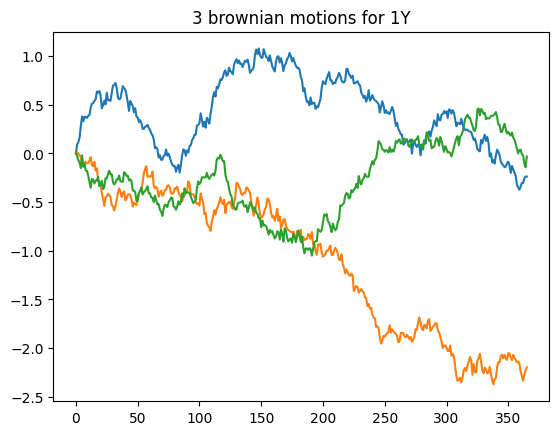

In [16]:
testBrownian()